In [39]:
from problems import Knapsack

import numpy as np
import matplotlib.pyplot as plt

In [129]:
instance = Knapsack.get_instances()[6][11]

In [130]:
cost = instance.masked_cost().to_numpy()

In [131]:
a, b = instance.diagonalized()

In [132]:
cost2 = 1- (b > 0).to_numpy()

In [134]:
X = np.array([[0.0, 1.0], [1.0, 0.0]])

def single_x(n, i):
    initial = np.eye(1 << i)
    ret = np.kron(initial, X)
    return np.kron(ret, np.eye(1 << (n - i - 1)))

def build_x_hamiltonian(n):
    ret = np.zeros((1 << n, 1 << n))
    for i in range(n):
        ret += single_x(n, i)
    return ret

In [135]:
import scipy as sp

In [136]:
mixer = build_x_hamiltonian(6)

smixer = sp.sparse.csr_matrix(mixer)
scost1 = 4 * sp.sparse.diags([cost], [0])
scost2 = 4 * sp.sparse.diags([cost2], [0])

In [137]:
def get_ham(a, b):
    c = 1 - a - b
    return c * smixer + a * scost1 + b * scost2

In [138]:
def get_e0e1(a, b):
    h = get_ham(a, b)
    return sp.sparse.linalg.eigsh(h, k=2, return_eigenvectors=False, which="SA")

def get_gap(a, b):
    a, b = get_e0e1(a, b)
    return a - b

In [139]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

res = np.array([[get_gap(xi, yi) if xi + yi <= 1 else np.nan for xi in x] for yi in y ])

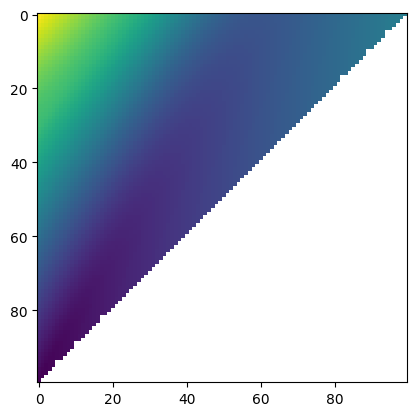

In [140]:
plt.imshow(res)